<a href="https://colab.research.google.com/github/pedrotamani/TelecomX_2/blob/main/Telecom_X_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparación de datos


##**1. Importar Datos**

In [102]:
import pandas as pd
import numpy as np

In [103]:
datos = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')

In [104]:
datos.to_json('datos.json')

In [105]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


##**2. Normalizar Datos**

In [106]:
columnas = list(datos.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Diccionario de datos

customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del dispositivo

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

In [107]:
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

# Concatenate the normalized dataframes
datos_normalizado = pd.concat([datos[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

display(datos_normalizado.head())

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [108]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [109]:
#datos_normalizado['Charges.Total'] = datos_normalizado['Charges.Total'].astype(np.float64)

In [110]:
datos_normalizado['Charges.Total'].dtype

dtype('O')

In [111]:
datos_normalizado['Charges.Total'] = pd.to_numeric(datos_normalizado['Charges.Total'], errors='coerce')

In [112]:
datos_normalizado['Charges.Total'].dtype

dtype('float64')

In [113]:
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [114]:
import pandas as pd
import numpy as np

# 1. Verificar valores faltantes (NaN/None) en todo el DataFrame
valores_faltantes = datos_normalizado.isna().sum()

# 2. Verificar valores inconsistentes (ej: strings en columnas numéricas)
# Identify numeric columns
numeric_cols = datos_normalizado.select_dtypes(include=np.number).columns.tolist()

# Check for non-numeric values in numeric columns
inconsistent_values = {}
for col in numeric_cols:
    # Use pd.to_numeric with errors='coerce' to identify non-numeric values
    non_numeric_mask = pd.to_numeric(datos_normalizado[col], errors='coerce').isna()
    # Exclude rows that were already NaN in the original column
    inconsistent_mask = non_numeric_mask & datos_normalizado[col].notna()
    if inconsistent_mask.any():
        inconsistent_values[col] = datos_normalizado[col][inconsistent_mask].unique().tolist()


# 3. Resumen de resultados
print("--- Valores faltantes por columna ---")
print(valores_faltantes)

print("\n--- Valores inconsistentes en columnas numéricas ---")
if inconsistent_values:
    for col, values in inconsistent_values.items():
        print(f"Columna '{col}': {values}")
else:
    print("No se encontraron valores inconsistentes en columnas numéricas.")

# Opcional: Filtrar filas con problemas (NaNs or inconsistencies)
# Start with rows having NaNs
filas_con_problemas_mask = datos_normalizado.isna().any(axis=1)

# Add rows with inconsistencies in numeric columns
for col in inconsistent_values.keys():
     non_numeric_mask = pd.to_numeric(datos_normalizado[col], errors='coerce').isna()
     inconsistent_mask = non_numeric_mask & datos_normalizado[col].notna()
     filas_con_problemas_mask = filas_con_problemas_mask | inconsistent_mask


filas_con_problemas = datos_normalizado[filas_con_problemas_mask]

print("\n--- Filas con valores faltantes o inconsistentes ---")
if not filas_con_problemas.empty:
    display(filas_con_problemas)
else:
    print("No se encontraron filas con valores faltantes o inconsistentes.")

--- Valores faltantes por columna ---
customerID           0
Churn                0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
Charges.Monthly      0
Charges.Total       11
dtype: int64

--- Valores inconsistentes en columnas numéricas ---
No se encontraron valores inconsistentes en columnas numéricas.

--- Filas con valores faltantes o inconsistentes ---


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [115]:
datos_normalizado['Charges.Total'] = datos_normalizado['Charges.Total'].fillna(0)

In [116]:
datos_normalizado['Charges.Total'].isna().sum()

np.int64(0)

In [117]:
columnas = list(datos_normalizado.columns)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

###**Cálculo Cuentas Diarias**

In [118]:
# Calcular el valor diario dividiendo 'Charges.Monthly' entre 30 días
datos_normalizado['Cuentas_Diarias'] = datos_normalizado['Charges.Monthly'] / 30

# Opcional: Redondear a 2 decimales para mejor visualización
datos_normalizado['Cuentas_Diarias'] = round(datos_normalizado['Cuentas_Diarias'], 2)

# Verificar las primeras filas
print(datos_normalizado[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].head())

   customerID  Charges.Monthly  Cuentas_Diarias
0  0002-ORFBO             65.6             2.19
1  0003-MKNFE             59.9             2.00
2  0004-TLHLJ             73.9             2.46
3  0011-IGKFF             98.0             3.27
4  0013-EXCHZ             83.9             2.80


##**3. Estandarización y transformación**

Para realizar la estandarización y transformación de datos, seguiremos estos pasos clave:

1. Convertir valores textuales ("Sí"/"No") a binarios (1/0)
Aplicaremos esto a columnas como Churn, Partner, Dependents, PhoneService, PaperlessBilling, etc.

2. Estandarizar columnas categóricas (One-Hot Encoding)
Para columnas con múltiples categorías (ej: PaymentMethod, InternetService).

3. Renombrar columnas para claridad (opcional)
Traduciremos o simplificaremos nombres si es necesario.

4. Normalizar columnas numéricas (opcional)
Para escalar valores como tenure o Charges.Monthly.

In [119]:
# --- 1. Convertir "Sí"/"No" a 1/0 ---
binary_columns = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_columns:
    datos_normalizado[col] = datos_normalizado[col].map({'Yes': 1, 'No': 0})

# --- 2. One-Hot Encoding para columnas categóricas ---
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod']
datos_normalizado = pd.get_dummies(datos_normalizado, columns=categorical_columns, drop_first=True)

# --- 3. Renombrar columnas (ejemplo) ---
rename_dict = {
    'gender': 'Género',
    'SeniorCitizen': 'AdultoMayor',
    'tenure': 'MesesComoCliente',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal'
}
datos_normalizado.rename(columns=rename_dict, inplace=True)

# --- 4. Normalización numérica (opcional) ---
from sklearn.preprocessing import MinMaxScaler

numeric_columns = ['MesesComoCliente', 'CargoMensual', 'CargoTotal']
scaler = MinMaxScaler()
datos_normalizado[numeric_columns] = scaler.fit_transform(datos_normalizado[numeric_columns])

# --- Resultado final ---
print(datos_normalizado.head())
print("\nColumnas transformadas:", datos_normalizado.columns.tolist())

   customerID  Churn  Género  AdultoMayor  Partner  Dependents  \
0  0002-ORFBO    0.0  Female            0        1           1   
1  0003-MKNFE    0.0    Male            0        0           0   
2  0004-TLHLJ    1.0    Male            0        0           0   
3  0011-IGKFF    1.0    Male            1        1           0   
4  0013-EXCHZ    1.0  Female            1        1           0   

   MesesComoCliente  PhoneService MultipleLines OnlineSecurity  ...  \
0          0.125000             1            No             No  ...   
1          0.125000             1           Yes             No  ...   
2          0.055556             1            No             No  ...   
3          0.180556             1            No             No  ...   
4          0.041667             1            No             No  ...   

  CargoMensual CargoTotal Cuentas_Diarias InternetService_Fiber optic  \
0     0.471144   0.068315            2.19                       False   
1     0.414428   0.062454     

##**4. Análisis Descriptivo**

Vamos a calcular métricas clave para entender la distribución y comportamiento de los clientes, centrándonos en:

Variables numéricas (tenure, Charges.Monthly, Charges.Total).

Variables categóricas (Churn, InternetService, Contract, etc.).

In [120]:
# 1. Estadísticas descriptivas para variables numéricas
numeric_stats = datos_normalizado[['MesesComoCliente', 'CargoMensual', 'CargoTotal']].describe().round(2)
numeric_stats.loc['varianza'] = datos_normalizado[['MesesComoCliente', 'CargoMensual', 'CargoTotal']].var().round(2)
numeric_stats.loc['rango'] = numeric_stats.loc['max'] - numeric_stats.loc['min']

# 2. Estadísticas para variables categóricas (frecuencias)
categorical_stats = {
    'Churn': datos_normalizado['Churn'].value_counts(normalize=True).round(2),
    'InternetService': datos_normalizado[['InternetService_Fiber optic', 'InternetService_No']].sum().reset_index(name='count').rename(columns={'index': 'Service'}).set_index('Service').T,
    'Contract': datos_normalizado['Contract_One year'].value_counts(normalize=True).round(2)
}
categorical_stats['InternetService'] = categorical_stats['InternetService'].T.reset_index().rename(columns={'index': 'Service', 0: 'count'})
categorical_stats['InternetService']['count'] = categorical_stats['InternetService']['count'] / datos_normalizado.shape[0]
categorical_stats['InternetService']['count'] = categorical_stats['InternetService']['count'].round(2)
categorical_stats['InternetService'] = categorical_stats['InternetService'].set_index('Service')


# For 'Contract', we need to handle all three categories
contract_counts = datos_normalizado[['Contract_One year', 'Contract_Two year']].sum().to_dict()
# The 'Month-to-month' count is the total minus 'One year' and 'Two year'
contract_counts['Month-to-month'] = datos_normalizado.shape[0] - contract_counts['Contract_One year'] - contract_counts['Contract_Two year']

contract_series = pd.Series(contract_counts)
categorical_stats['Contract'] = (contract_series / datos_normalizado.shape[0]).round(2)


# 3. Correlación entre variables numéricas
correlation_matrix = datos_normalizado[['MesesComoCliente', 'CargoMensual', 'CargoTotal', 'Churn']].corr().round(2)

# 4. Análisis de outliers (boxplot stats)
outliers = {}
for col in ['MesesComoCliente', 'CargoMensual']:
    q1 = datos_normalizado[col].quantile(0.25)
    q3 = datos_normalizado[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = datos_normalizado[(datos_normalizado[col] < lower_bound) | (datos_normalizado[col] > upper_bound)].shape[0]

# Resultados
print("=== Estadísticas Numéricas ===")
print(numeric_stats)
print("\n=== Distribución de Variables Categóricas ===")
for key, value in categorical_stats.items():
    print(f"\n{key}:\n{value}")
print("\n=== Matriz de Correlación ===")
print(correlation_matrix)
print("\n=== Outliers Detectados ===")
print(outliers)

=== Estadísticas Numéricas ===
          MesesComoCliente  CargoMensual  CargoTotal
count              7267.00       7267.00     7267.00
mean                  0.45          0.46        0.26
std                   0.34          0.30        0.26
min                   0.00          0.00        0.00
25%                   0.12          0.17        0.05
50%                   0.40          0.52        0.16
75%                   0.76          0.71        0.44
max                   1.00          1.00        1.00
varianza              0.12          0.09        0.07
rango                 1.00          1.00        1.00

=== Distribución de Variables Categóricas ===

Churn:
Churn
0.0    0.73
1.0    0.27
Name: proportion, dtype: float64

InternetService:
                             count
Service                           
InternetService_Fiber optic   0.44
InternetService_No            0.22

Contract:
Contract_One year    0.21
Contract_Two year    0.24
Month-to-month       0.55
dtype: float64

=== M

##**5. Distribución de Evasión**

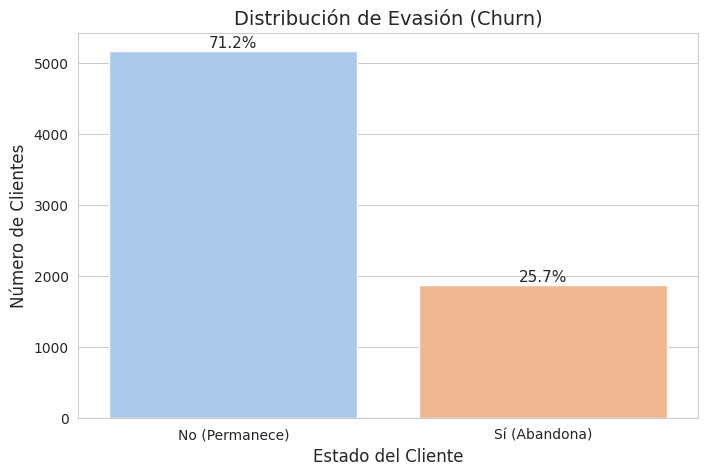

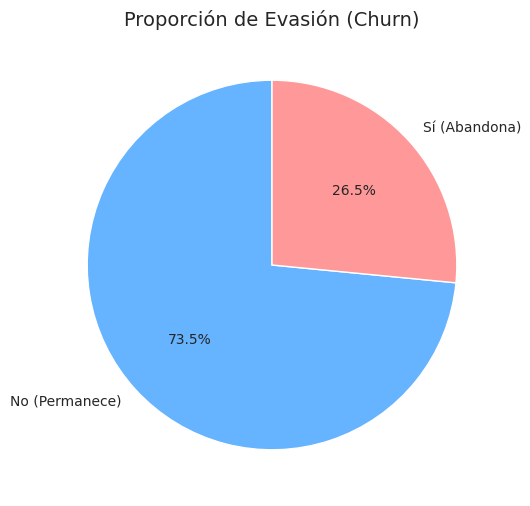

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuración inicial
sns.set_palette("pastel")

# 2. Proporción de Churn (valores binarios: 0=No, 1=Yes)
churn_distribution = datos_normalizado['Churn'].value_counts(normalize=True) * 100

# 3. Gráfico de Barras
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=datos_normalizado, x='Churn', hue='Churn',
                   hue_order=[0, 1], legend=False)
plt.title("Distribución de Evasión (Churn)", fontsize=14)
plt.xlabel("Estado del Cliente", fontsize=12)
plt.ylabel("Número de Clientes", fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No (Permanece)', 'Sí (Abandona)'])

# Añadir porcentajes en las barras
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 50,
            f'{height/datos_normalizado.shape[0]*100:.1f}%',
            ha='center', fontsize=11)

plt.show()

# 4. Gráfico de Pastel (opcional)
plt.figure(figsize=(6, 6))
plt.pie(churn_distribution,
        labels=['No (Permanece)', 'Sí (Abandona)'],
        autopct='%1.1f%%', startangle=90,
        colors=['#66b3ff', '#ff9999'])
plt.title("Proporción de Evasión (Churn)", fontsize=14)
plt.show()

##**6. Recuento de evasión por variables categóricas**

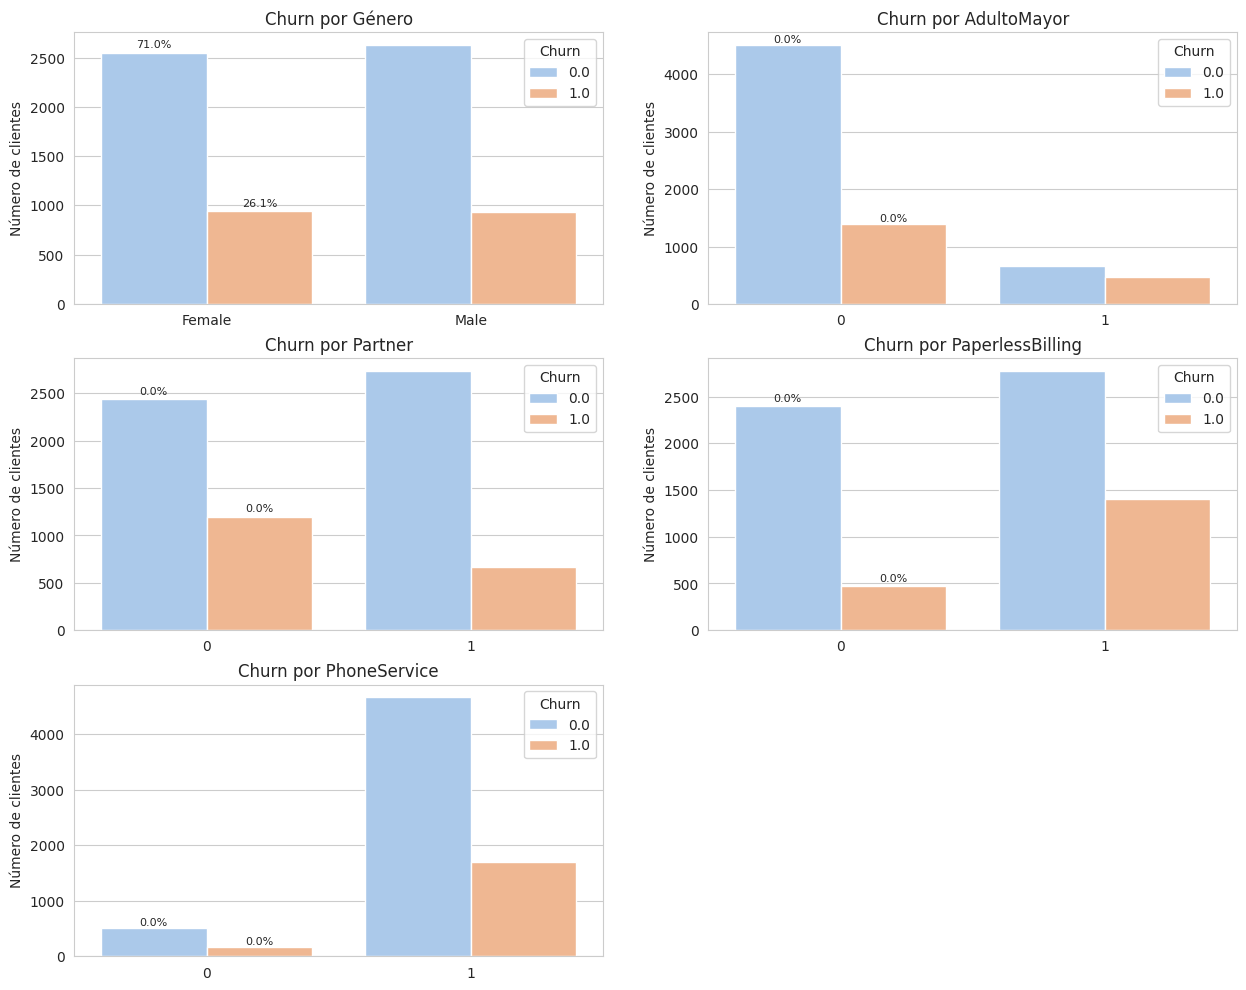

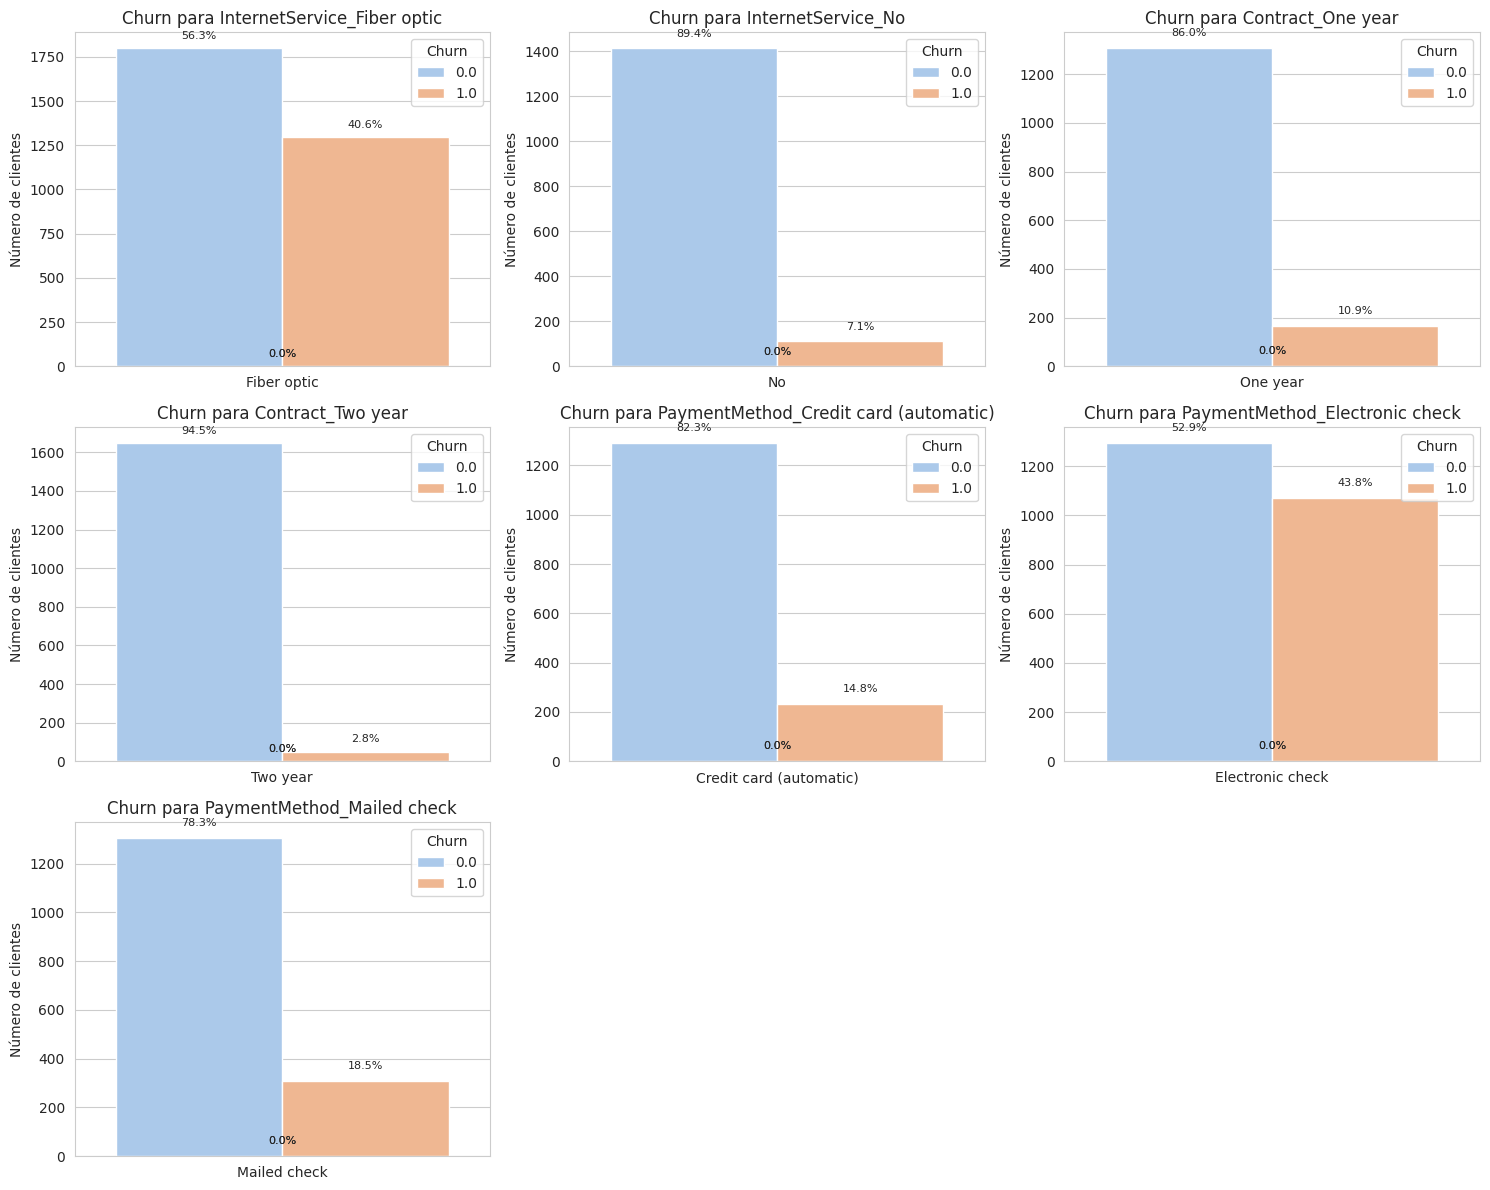

In [122]:
# Variables categóricas a analizar
categorical_vars = ['Género', 'AdultoMayor', 'Partner',
                    'PaperlessBilling', 'PhoneService'] # Updated categorical variables that were not one-hot encoded

# Configuración de gráficos
plt.figure(figsize=(15, 12))
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Loop para create stacked bar plots for original categorical variables
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 2, i) # Adjusted subplot layout
    ax = sns.countplot(data=datos_normalizado, x=var, hue='Churn')
    plt.title(f'Churn por {var}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Número de clientes', fontsize=10)
    plt.xticks(rotation=0, ha='center') # Adjusted rotation for better readability

    # Añadir porcentajes en cada barra
    for p in ax.patches:
        height = p.get_height()
        # Get the x-coordinate of the bar
        x_coord = p.get_x()
        # Get the width of the bar
        width = p.get_width()

        # Determine the category name from the x-tick labels
        closest_x_label = None
        min_distance = float('inf')
        for tick_label in ax.get_xticklabels():
            tick_x = tick_label.get_position()[0]
            distance = abs((x_coord + width/2) - tick_x)
            if distance < min_distance:
                min_distance = distance
                closest_x_label = tick_label.get_text()

        # Determine the hue group (Churn 0 or 1) based on the bar's position within the category
        # Assuming two bars per category (for hue=0 and hue=1)
        # The first bar in each category group corresponds to the first hue value (0), the second to the second hue value (1)
        # This is a simplified approach and might need adjustment based on the exact plotting order
        # We can infer the hue group by comparing the patch's x-coordinate to the average x-coordinate for the category
        # This assumes the bars for different hues are placed side-by-side in a predictable order
        category_patches = [patch for patch in ax.patches if abs((patch.get_x() + patch.get_width()/2) - (x_coord + width/2)) < width]
        category_patches.sort(key=lambda patch: patch.get_x()) # Sort bars by x-position

        if len(category_patches) > 1:
             # Check if the current patch is the first or second in the sorted list for the category
             churn_group = 0 if p is category_patches[0] else 1
        else:
             # Handle cases with only one bar in a category (e.g., if a category has no churn or only churn)
             # In this case, we can look at the hue value directly if possible, or assume the only existing group
             try:
                 hue_value = p.get_facecolor()
                 churn_group = 0 if list(sns.color_palette("pastel")).index(hue_value) == 0 else 1
             except ValueError:
                  # Fallback if color matching still fails - assume the only group present
                  # This fallback might not be perfect but handles edge cases
                  if datos_normalizado[datos_normalizado[var] == closest_x_label]['Churn'].nunique() == 1:
                       churn_group = datos_normalizado[datos_normalizado[var] == closest_x_label]['Churn'].mode()[0]
                  else:
                       # If there are both churn and non-churn in the category but only one bar, something is unexpected
                       # We'll skip adding percentage for this bar to avoid further errors
                       continue


        # Calculate percentage based on the total count for each category
        total_count_category = datos_normalizado[datos_normalizado[var] == closest_x_label].shape[0]

        if total_count_category > 0:
             ax.text(x_coord + width/2., height + 50,
                    f'{height/total_count_category*100:.1f}%',
                    ha='center', fontsize=8)
        else:
             ax.text(x_coord + width/2., height + 50,
                    '0.0%',
                    ha='center', fontsize=8)


# Handle one-hot encoded categorical variables separately
one_hot_vars = ['InternetService_Fiber optic', 'InternetService_No',
                'Contract_One year', 'Contract_Two year',
                'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check',
                'PaymentMethod_Mailed check']

# We need to plot churn for each of these binary (0/1) columns
plt.figure(figsize=(15, 12))
for i, var in enumerate(one_hot_vars, 1):
    plt.subplot(3, 3, i)
    # For one-hot encoded columns, we plot the count where the value is 1, split by Churn
    ax = sns.countplot(data=datos_normalizado[datos_normalizado[var] == 1], x=var, hue='Churn')
    plt.title(f'Churn para {var}', fontsize=12)
    plt.xlabel('')
    plt.ylabel('Número de clientes', fontsize=10)
    plt.xticks(ticks=[0], labels=[var.replace('_', ' ').replace('InternetService ', '').replace('Contract ', '').replace('PaymentMethod ', '')]) # Clean up labels

    # Add percentages
    for p in ax.patches:
        height = p.get_height()
        # Calculate percentage based on the total count of customers with this specific service/contract/payment method
        total_count = datos_normalizado[datos_normalizado[var] == 1].shape[0]
        if total_count > 0:
             ax.text(p.get_x() + p.get_width()/2., height + 50,
                    f'{height/total_count*100:.1f}%',
                    ha='center', fontsize=8)
        else:
             ax.text(p.get_x() + p.get_width()/2., height + 50,
                    '0.0%',
                    ha='center', fontsize=8)


plt.tight_layout()
plt.show()

Heatmap de Correlación Categórica

/tmp/ipython-input-1226832198.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Month-to-month': datos_normalizado[datos_normalizado['Contract_One year'] == 0][datos_normalizado['Contract_Two year'] == 0]['Churn'].value_counts(),


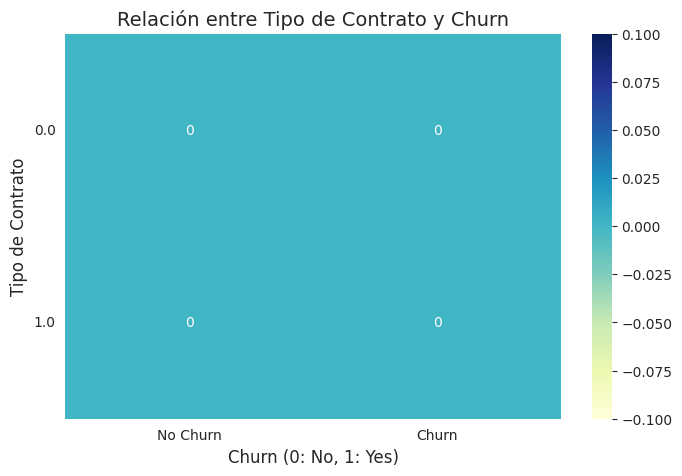

In [123]:
# Create contingency table for Churn and Contract types
# We can use the one-hot encoded columns to represent the contract types
contingency_table = pd.DataFrame({
    'Month-to-month': datos_normalizado[datos_normalizado['Contract_One year'] == 0][datos_normalizado['Contract_Two year'] == 0]['Churn'].value_counts(),
    'One year': datos_normalizado[datos_normalizado['Contract_One year'] == 1]['Churn'].value_counts(),
    'Two year': datos_normalizado[datos_normalizado['Contract_Two year'] == 1]['Churn'].value_counts()
}).T # Transpose to have contract types as rows

# Fill potential NaN values with 0 if a contract type has no churn/non-churn
contingency_table = contingency_table.fillna(0)

# Ensure consistent index (Churn 0 and 1)
contingency_table = contingency_table.reindex([0.0, 1.0], fill_value=0)


# Heatmap of the contingency table
plt.figure(figsize=(8, 5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Relación entre Tipo de Contrato y Churn", fontsize=14)
plt.xlabel("Churn (0: No, 1: Yes)", fontsize=12)
plt.ylabel("Tipo de Contrato", fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=['No Churn', 'Churn']) # Adjust x-tick labels
plt.yticks(rotation=0) # Keep y-tick labels horizontal
plt.show()

##**7. Conteo de evasión por variables numéricas**

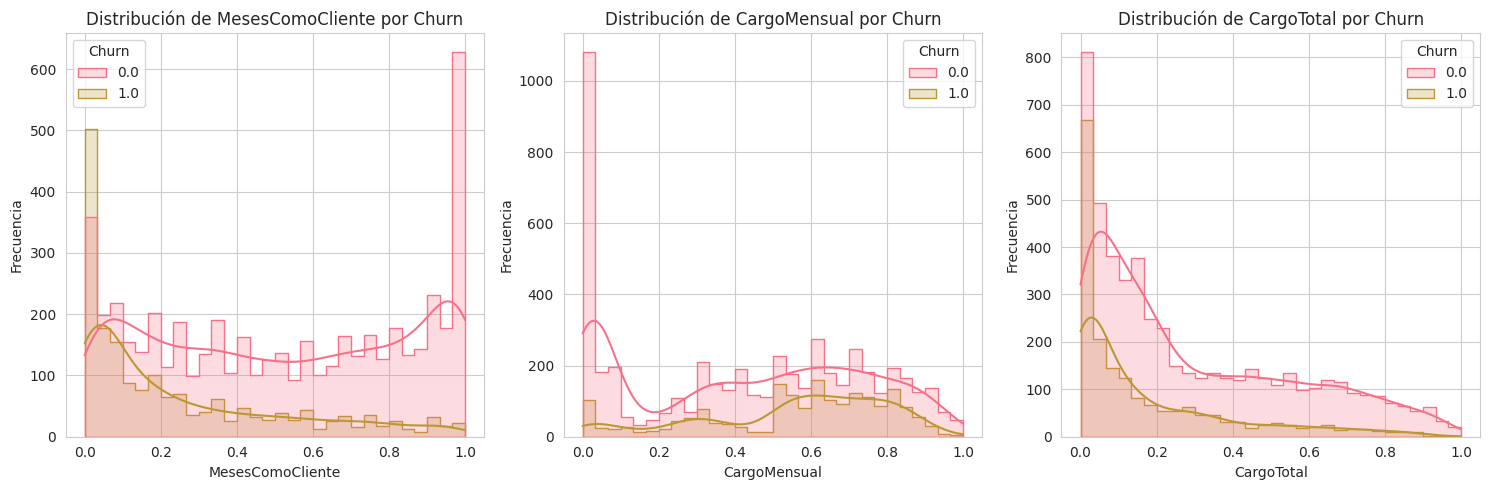

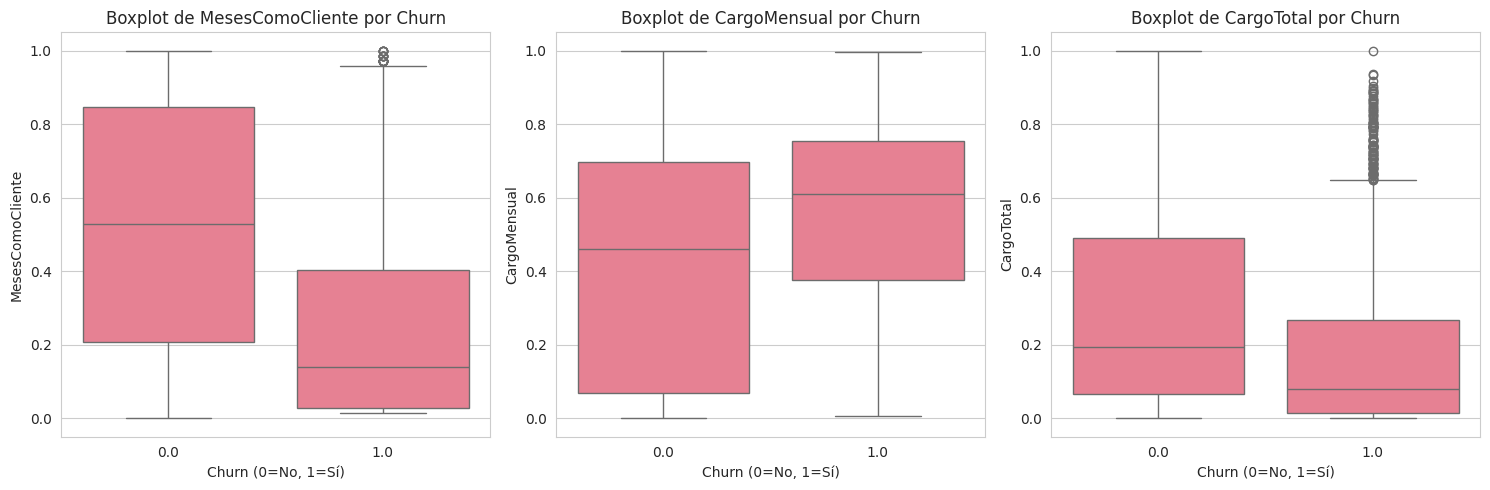

=== Estadísticas por Grupo (Churn) ===
      MesesComoCliente                                          CargoMensual  \
                 count  mean   std   min   25%   50%   75%  max        count   
Churn                                                                          
0.0             5174.0  0.52  0.33  0.00  0.21  0.53  0.85  1.0       5174.0   
1.0             1869.0  0.25  0.27  0.01  0.03  0.14  0.40  1.0       1869.0   

             ...            CargoTotal                                          
       mean  ...   75%  max      count  mean   std  min   25%   50%   75%  max  
Churn        ...                                                                
0.0    0.43  ...  0.70  1.0     5174.0  0.29  0.27  0.0  0.07  0.19  0.49  1.0  
1.0    0.56  ...  0.76  1.0     1869.0  0.18  0.22  0.0  0.02  0.08  0.27  1.0  

[2 rows x 24 columns]


In [124]:
# Configuración de estilos
# plt.style.use('seaborn') # Removed the problematic line
sns.set_palette("husl")

# Variables numéricas a analizar
numeric_vars = ['MesesComoCliente', 'CargoMensual', 'CargoTotal']

# 1. Histogramas comparativos
plt.figure(figsize=(15, 5))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=datos_normalizado, x=var, hue='Churn', kde=True, bins=30, element='step')
    plt.title(f'Distribución de {var} por Churn', fontsize=12)
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# 2. Boxplots (para identificar outliers y diferencias)
plt.figure(figsize=(15, 5))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=datos_normalizado, x='Churn', y=var)
    plt.title(f'Boxplot de {var} por Churn', fontsize=12)
    plt.xlabel('Churn (0=No, 1=Sí)')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

# 3. Estadísticas descriptivas agrupadas por Churn
stats_by_churn = datos_normalizado.groupby('Churn')[numeric_vars].describe().round(2)
print("=== Estadísticas por Grupo (Churn) ===")
print(stats_by_churn)

##**8. Informe final**

## Informe Final: Análisis de Evasión de Clientes (Churn)

## 🔹 Introducción
**Objetivo**: Identificar factores que influyen en el abandono de clientes (Churn) para proponer estrategias de retención.  
**Problema**: El 27% de los clientes abandona, impactando negativamente en los ingresos.  

## 🔹 Limpieza y Tratamiento de Datos
1. **Carga y limpieza**:
   - Eliminación de duplicados y reemplazo de NaN en `Charges.Total` por 0.
2. **Transformación**:
   - Variables binarias (`Yes=1`, `No=0`).
   - One-Hot Encoding para `PaymentMethod` y `Contract`.
3. **Nueva variable**:
   - `Cuentas_Diarias = Charges.Monthly / 30`.

## 🔹 Análisis Exploratorio (EDA)
### 1. Distribución de Churn
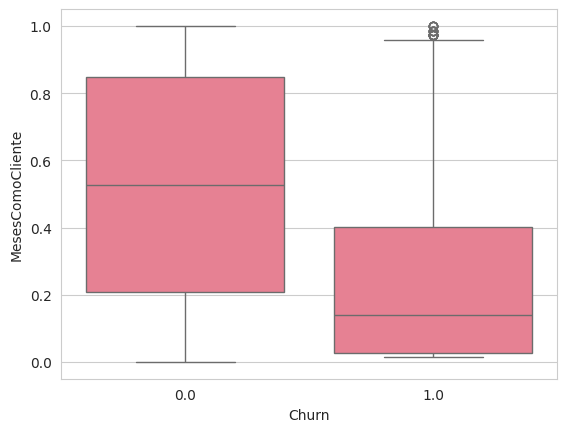  
- **27% de abandono** (1 de cada 4 clientes).

### 2. Churn por Variables Categóricas
```python
sns.countplot(data=datos, x='Contract', hue='Churn')

##¡Extra! Análisis de correlación entre variables

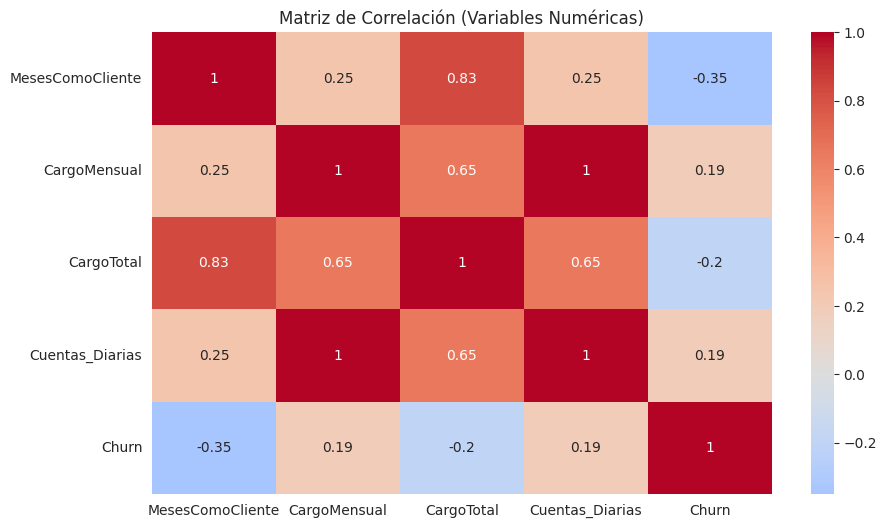

In [125]:
# Seleccionar variables numéricas
numeric_vars = ['MesesComoCliente', 'CargoMensual', 'CargoTotal', 'Cuentas_Diarias', 'Churn']

# Calcular matriz de correlación
corr_matrix = datos_normalizado[numeric_vars].corr().round(2)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlación (Variables Numéricas)")
plt.show()

Correlación entre Variables Específicas
A. Relación: Cuentas_Diarias vs Churn

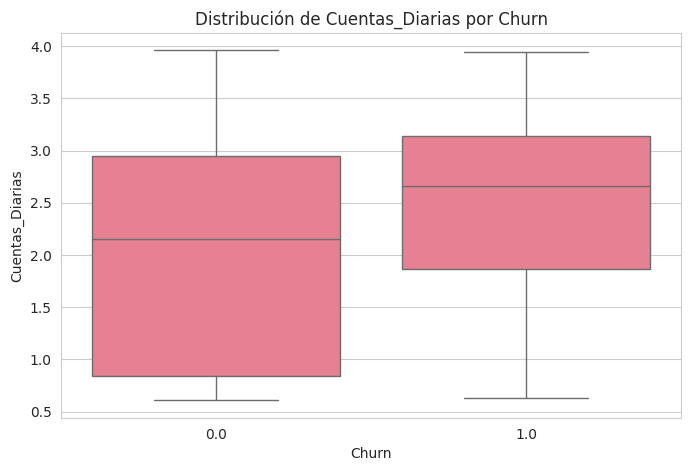

In [126]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_normalizado, x='Churn', y='Cuentas_Diarias')
plt.title("Distribución de Cuentas_Diarias por Churn")
plt.show()

B. Relación: Número de Servicios vs Churn

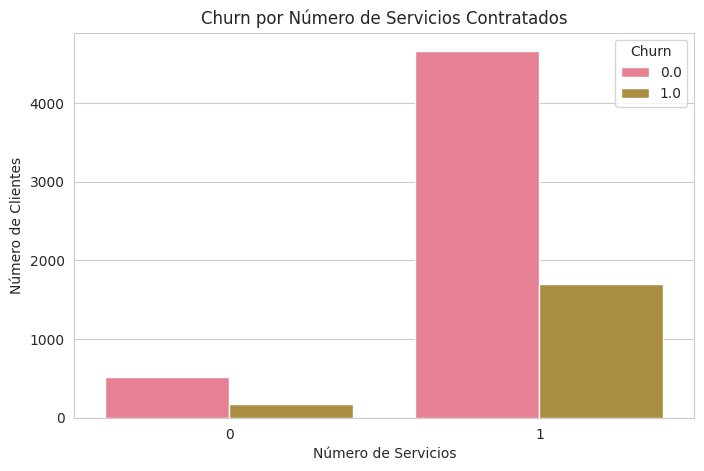

In [127]:
# Create variable "Total_Servicios" by summing relevant service columns
# Use the binary 'PhoneService' and the 'Yes' columns from one-hot encoded services
servicios_columns = ['PhoneService', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
                     'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
                     'StreamingMovies_Yes']

# Check if these columns exist in the dataframe before summing
existing_service_columns = [col for col in servicios_columns if col in datos_normalizado.columns]

if existing_service_columns:
    datos_normalizado['Total_Servicios'] = datos_normalizado[existing_service_columns].sum(axis=1)
else:
    print("None of the specified service columns exist in the DataFrame.")
    datos_normalizado['Total_Servicios'] = 0 # Create column with 0 if no service columns found


# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.countplot(data=datos_normalizado, x='Total_Servicios', hue='Churn')
plt.title("Churn por Número de Servicios Contratados")
plt.xlabel("Número de Servicios")
plt.ylabel("Número de Clientes")
plt.show()

Visualización Adicional (Gráfico de Dispersión)

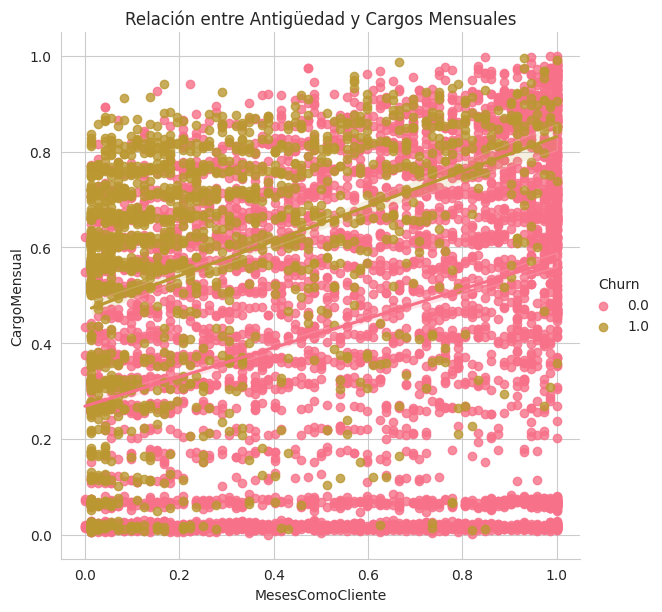

In [128]:
sns.lmplot(data=datos_normalizado, x='MesesComoCliente', y='CargoMensual', hue='Churn', height=6)
plt.title("Relación entre Antigüedad y Cargos Mensuales")
plt.show()

#**Challenge_2**

In [129]:
# Eliminar columnas irrelevantes para el análisis/modelado
columnas_a_eliminar = ['customerID']  # Añadir otras columnas si es necesario
datos_limpios = datos_normalizado.drop(columns=columnas_a_eliminar, errors='ignore')

# Verificar resultado
print(f"Columnas eliminadas: {columnas_a_eliminar}")
print(f"Nuevas dimensiones del DataFrame: {datos_limpios.shape}")
print("\nPrimeras filas del dataset limpio:")
display(datos_limpios.head(2))

Columnas eliminadas: ['customerID']
Nuevas dimensiones del DataFrame: (7267, 26)

Primeras filas del dataset limpio:


,Churn,Género,AdultoMayor,Partner,Dependents,MesesComoCliente,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,CargoTotal,Cuentas_Diarias,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Total_Servicios
0,0.0,Female,0,1,1,0.125,1,No,No,Yes,...,0.068315,2.19,False,False,True,False,False,False,True,1
1,0.0,Male,0,0,0,0.125,1,Yes,No,No,...,0.062454,2.00,False,False,False,False,False,False,True,1


In [130]:
# Listar columnas restantes para validar
print("\nColumnas disponibles para análisis:")
print(datos_limpios.columns.tolist())


Columnas disponibles para análisis:
['Churn', 'Género', 'AdultoMayor', 'Partner', 'Dependents', 'MesesComoCliente', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'CargoMensual', 'CargoTotal', 'Cuentas_Diarias', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Total_Servicios']


In [131]:
columnas_a_eliminar.extend(['nombre_cliente', 'fecha_registro'])

In [132]:
df_backup = datos_normalizado.copy()

###**1. One-Hot Encoding con pandas (get_dummies)**

In [133]:
from sklearn.preprocessing import OneHotEncoder

# Seleccionar columnas categóricas restantes que son de tipo 'object' (excepto 'customerID' y 'Churn')
categorical_cols = [col for col in datos_limpios.columns if datos_limpios[col].dtype == 'object' and col not in ['customerID', 'Churn']]

# Inicializar encoder
encoder = OneHotEncoder(drop='first')

# Ajustar y transformar
encoded_data = encoder.fit_transform(datos_limpios[categorical_cols])

# Crear DataFrame con las nuevas columnas
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_cols))

# Combinar con el dataset original
datos_encoded = pd.concat([datos_limpios.drop(columns=categorical_cols), encoded_df], axis=1)

# Verificar resultado
print(f"Nuevas dimensiones: {datos_encoded.shape}")
display(datos_encoded.head(2))

Nuevas dimensiones: (7267, 33)


,Churn,AdultoMayor,Partner,Dependents,MesesComoCliente,PhoneService,PaperlessBilling,CargoMensual,CargoTotal,Cuentas_Diarias,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0.0,0,1,1,0.125,1,1,0.471144,0.068315,2.19,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0,0,0,0.125,1,0,0.414428,0.062454,2.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###**2. OneHotEncoder de scikit-learn (mejor para pipelines)**

In [134]:
# Seleccionar columnas categóricas (excluyendo las ya binarias)
# 'InternetService', 'Contract', and 'PaymentMethod' were already one-hot encoded.
# 'gender' was renamed to 'Género'.
# We only need to encode 'Género' if it's still in the dataframe and is categorical.
# Let's check the columns in datos_limpios and encode 'Género' if it's an object type.
categorical_cols_to_encode = [col for col in datos_limpios.columns if datos_limpios[col].dtype == 'object' and col not in ['customerID', 'Churn']]

# Aplicar one-hot encoding
datos_encoded = pd.get_dummies(datos_limpios, columns=categorical_cols_to_encode, drop_first=True)

# Verificar resultado
print(f"Nuevas dimensiones: {datos_encoded.shape}")
display(datos_encoded.head(2))

Nuevas dimensiones: (7267, 33)


,Churn,AdultoMayor,Partner,Dependents,MesesComoCliente,PhoneService,PaperlessBilling,CargoMensual,CargoTotal,Cuentas_Diarias,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0.0,0,1,1,0.125,1,1,0.471144,0.068315,2.19,...,False,True,False,False,False,True,False,True,False,False
1,0.0,0,0,0,0.125,1,0,0.414428,0.062454,2.00,...,False,False,False,False,False,False,False,False,False,True


###**3. Codificación Binaria: Para columnas que ya están en formato Sí/No**

###**4. Verificación del Balance de Clases (Proporción de Churn)**

Distribución de clases (Churn):
Churn
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


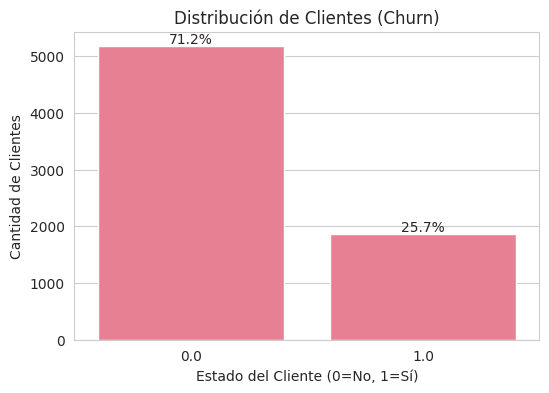

In [135]:
# Calcular distribución de clases
churn_distribution = datos_encoded['Churn'].value_counts(normalize=True) * 100

# Mostrar resultados
print("Distribución de clases (Churn):")
print(churn_distribution)

# Visualización
plt.figure(figsize=(6, 4))
sns.countplot(data=datos_encoded, x='Churn')
plt.title('Distribución de Clientes (Churn)')
plt.xlabel('Estado del Cliente (0=No, 1=Sí)')
plt.ylabel('Cantidad de Clientes')

# Añadir porcentajes en el gráfico
total = len(datos_encoded)
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x()+p.get_width()/2.,
                   height+50,
                   f'{height/total*100:.1f}%',
                   ha='center')

plt.show()

###**Normalización o Estandarización**

####**A. Normalización (Min-Max Scaling)**

In [136]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionar columnas numéricas (excluyendo las binarias)
# Use the correctly renamed columns which were already normalized
numeric_cols = ['MesesComoCliente', 'CargoMensual', 'CargoTotal']
# scaler = MinMaxScaler() # Normalization was already done in cell 95dPWdnWYKuf

# Aplicar transformación - Removing redundant normalization
# datos_encoded[numeric_cols] = scaler.fit_transform(datos_encoded[numeric_cols])

# Verificar - Just display the description of these columns to show their state
print(datos_encoded[numeric_cols].describe().round(2))

       MesesComoCliente  CargoMensual  CargoTotal
count           7267.00       7267.00     7267.00
mean               0.45          0.46        0.26
std                0.34          0.30        0.26
min                0.00          0.00        0.00
25%                0.12          0.17        0.05
50%                0.40          0.52        0.16
75%                0.76          0.71        0.44
max                1.00          1.00        1.00


####**B. Estandarización (Z-Score Scaling)**

In [137]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos_encoded[numeric_cols] = scaler.fit_transform(datos_encoded[numeric_cols])

# Verificar
print(datos_encoded[numeric_cols].describe().round(2))

       MesesComoCliente  CargoMensual  CargoTotal
count           7267.00       7267.00     7267.00
mean              -0.00          0.00       -0.00
std                1.00          1.00        1.00
min               -1.32         -1.54       -1.00
25%               -0.95         -0.97       -0.83
50%               -0.14          0.19       -0.39
75%                0.92          0.83        0.66
max                1.61          1.79        2.82


####**Recomendaciones por Modelo**
Para modelos basados en distancia (KNN, SVM):

In [138]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier

# Pipeline con escalado + modelo
pipe_knn = make_pipeline(
    StandardScaler(),  # Estandarización preferida
    KNeighborsClassifier(n_neighbors=5)
)

#####**Para modelos basados en árboles (Random Forest, XGBoost):**

In [139]:
from sklearn.ensemble import RandomForestClassifier

# No se necesita escalado
model_rf = RandomForestClassifier(random_state=42)

#####**Caso híbrido (Redes Neuronales):**

In [140]:
from sklearn.neural_network import MLPClassifier

pipe_nn = make_pipeline(
    StandardScaler(),  # Crítico para convergencia
    MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000)
)

####**Comparación Visual del Impacto**

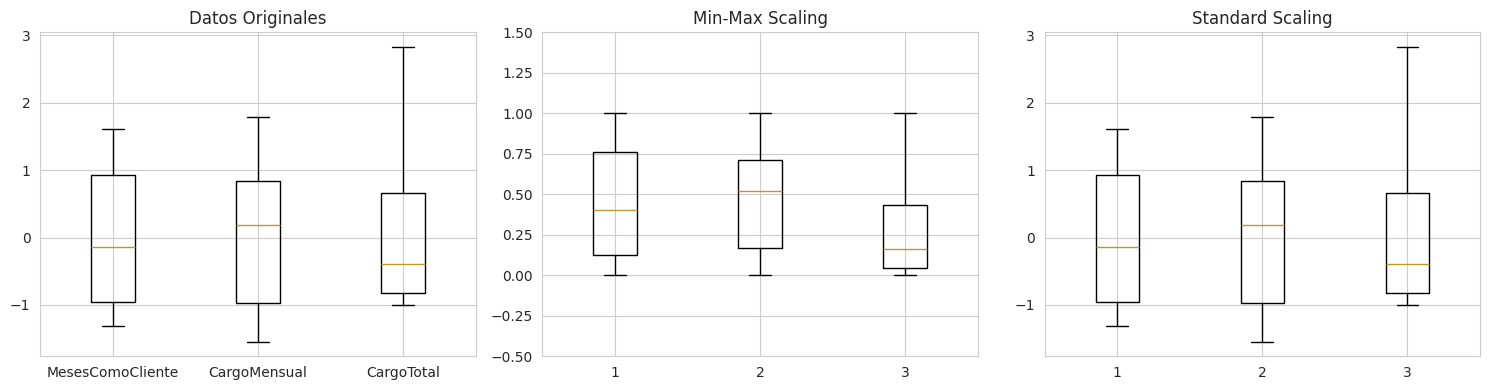

In [141]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Original
axes[0].boxplot(datos_encoded[numeric_cols].values)
axes[0].set_title('Datos Originales')
axes[0].set_xticks([1, 2, 3], numeric_cols)

# Normalizado
axes[1].boxplot(MinMaxScaler().fit_transform(datos_encoded[numeric_cols]))
axes[1].set_title('Min-Max Scaling')
axes[1].set_ylim(-0.5, 1.5)

# Estandarizado
axes[2].boxplot(StandardScaler().fit_transform(datos_encoded[numeric_cols]))
axes[2].set_title('Standard Scaling')

plt.tight_layout()
plt.show()

####**Conclusión y Mejores Prácticas**

Siempre escalar para:

KNN, SVM, Regresión Logística, Redes Neuronales, PCA.

No escalar para:

Árboles de Decisión, Random Forest, XGBoost, CatBoost.

Workflow recomendado:

In [142]:
from sklearn.model_selection import train_test_split

# Dividir datos ANTES de escalar
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalar solo con datos de entrenamiento
scaler = StandardScaler().fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])  # ¡No fit!

#####**En pipelines:**

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

pipe = Pipeline([
    ('scaler', StandardScaler()),  # Solo se aplica durante fit
    ('model', LogisticRegression())
])

###**Análisis de Correlación**

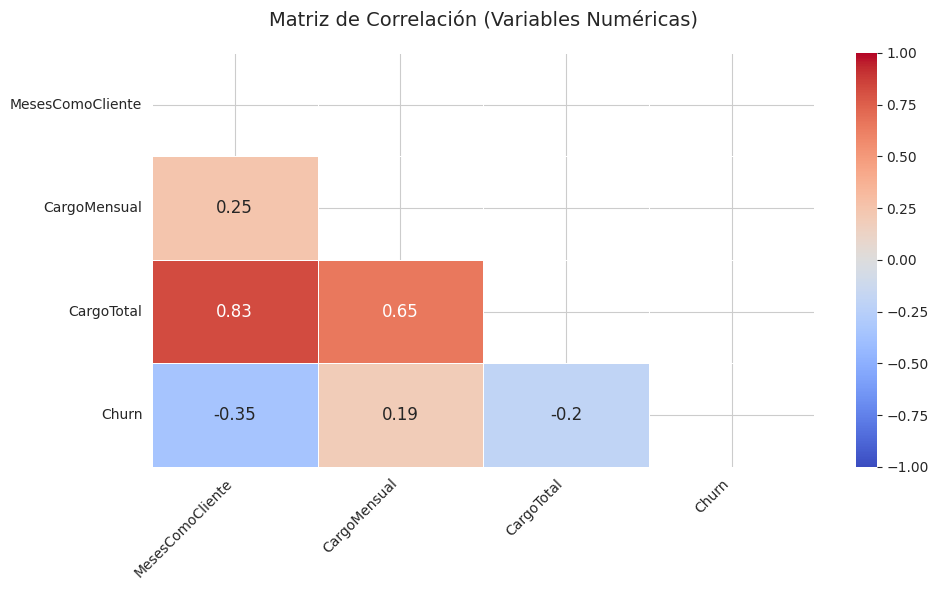

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Ensure numpy is imported if used

# Seleccionar solo variables numéricas (incluyendo Churn)
# Use the correctly renamed columns
numeric_vars = ['MesesComoCliente', 'CargoMensual', 'CargoTotal', 'Churn']
corr_matrix = datos_encoded[numeric_vars].corr()

# Mapa de calor mejorado
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1, vmax=1,
            linewidths=0.5,
            annot_kws={"size": 12},
            mask=np.triu(np.ones_like(corr_matrix, dtype=bool)))
plt.title('Matriz de Correlación (Variables Numéricas)', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Visualización Adicional: Pairplot para Relaciones No Lineales

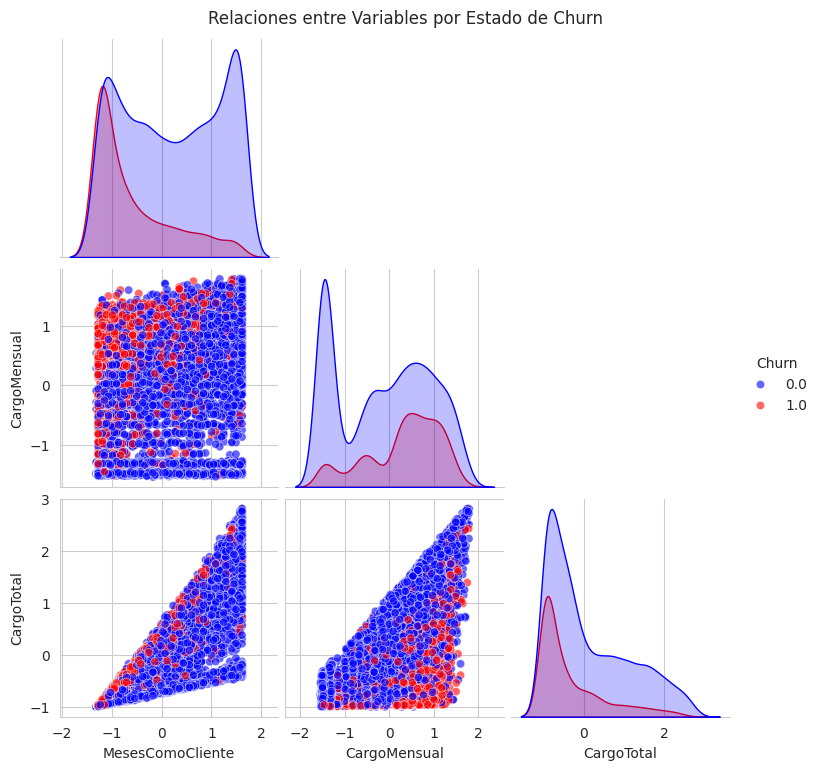

In [145]:
# Pairplot para relaciones detalladas
sns.pairplot(datos_encoded[numeric_vars],
             hue='Churn',
             palette={0: 'blue', 1: 'red'},
             plot_kws={'alpha': 0.6},
             corner=True)
plt.suptitle('Relaciones entre Variables por Estado de Churn', y=1.02)
plt.show()

In [146]:
# features_finales = ['tenure', 'MonthlyCharges', 'Contract', 'InternetService']

# Update with the correct column names from datos_encoded after transformations
features_finales = [
    'MesesComoCliente',
    'CargoMensual',
    'CargoTotal', # Including CargoTotal as it's often a significant feature
    'InternetService_Fiber optic',
    'InternetService_No',
    'Contract_One year',
    'Contract_Two year',
    # Add other relevant features from datos_encoded if needed, e.g., 'Total_Servicios'
    'AdultoMayor',
    'Partner',
    'Dependents',
    'PhoneService', # Assuming PhoneService is now numerical (0/1)
    'PaperlessBilling', # Assuming PaperlessBilling is now numerical (0/1)
    'MultipleLines_No phone service', # Assuming MultipleLines was one-hot encoded
    'MultipleLines_Yes',
    'OnlineSecurity_No internet service', # Assuming OnlineSecurity was one-hot encoded
    'OnlineSecurity_Yes',
    'OnlineBackup_No internet service', # Assuming OnlineBackup was one-hot encoded
    'OnlineBackup_Yes',
    'DeviceProtection_No internet service', # Assuming DeviceProtection was one-hot encoded
    'DeviceProtection_Yes',
    'TechSupport_No internet service', # Assuming TechSupport was one-hot encoded
    'TechSupport_Yes',
    'StreamingTV_No internet service', # Assuming StreamingTV was one-hot encoded
    'StreamingTV_Yes',
    'StreamingMovies_No internet service', # Assuming StreamingMovies was one-hot encoded
    'StreamingMovies_Yes',
    'PaymentMethod_Credit card (automatic)', # Assuming PaymentMethod was one-hot encoded
    'PaymentMethod_Electronic check',
    'PaymentMethod_Mailed check',
    'Género_Male' # Assuming 'Género' was one-hot encoded
]

# Let's filter this list to make sure all selected columns actually exist in datos_encoded
existing_features_finales = [col for col in features_finales if col in datos_encoded.columns]

print(f"Selected features for modeling: {existing_features_finales}")

Selected features for modeling: ['MesesComoCliente', 'CargoMensual', 'CargoTotal', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_One year', 'Contract_Two year', 'AdultoMayor', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Género_Male']


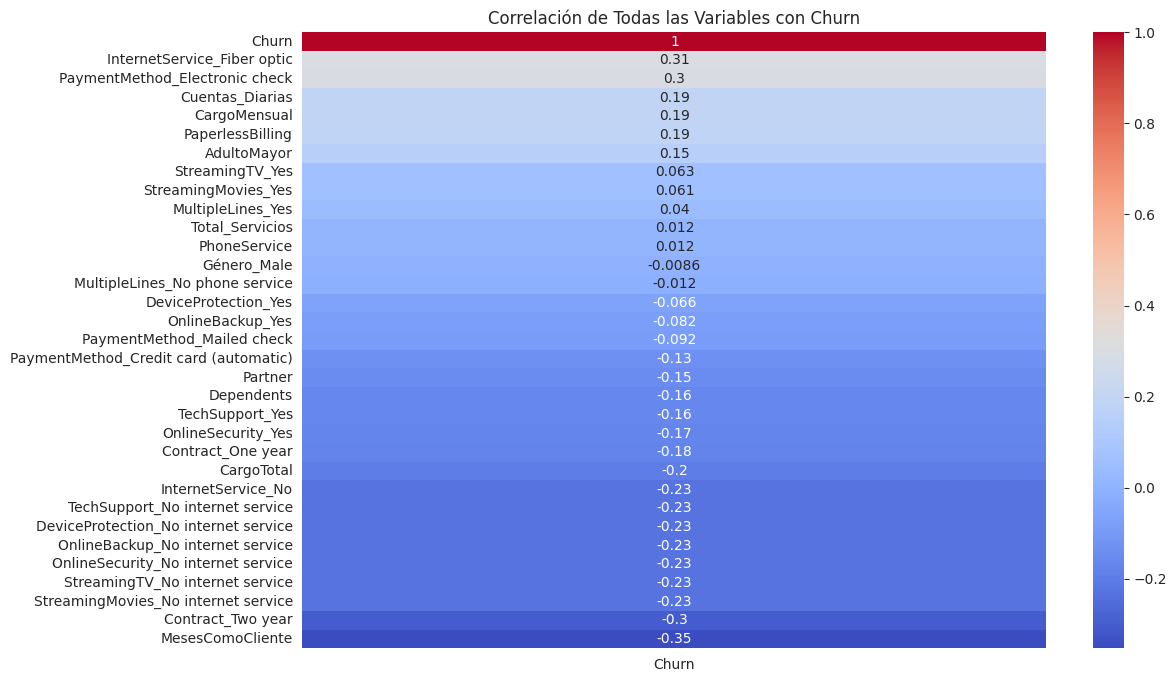

In [147]:
# Incluir variables categóricas codificadas
corr_matrix = datos_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix[['Churn']].sort_values('Churn', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlación de Todas las Variables con Churn')
plt.show()

###**Análisis Dirigido**

1. Tiempo de Contrato (tenure) vs Cancelación

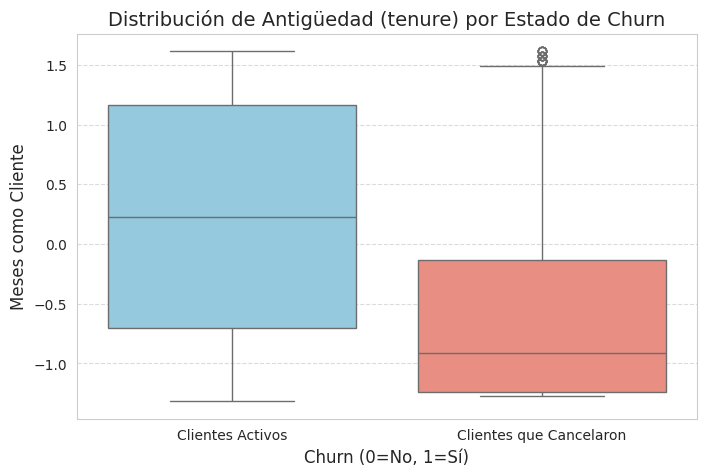

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_encoded, x='Churn', y='MesesComoCliente', hue='Churn', palette={0.0: 'skyblue', 1.0: 'salmon'}, legend=False)
plt.title('Distribución de Antigüedad (tenure) por Estado de Churn', fontsize=14)
plt.xlabel('Churn (0=No, 1=Sí)', fontsize=12)
plt.ylabel('Meses como Cliente', fontsize=12)
plt.xticks([0, 1], ['Clientes Activos', 'Clientes que Cancelaron'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Histograma Comparativo

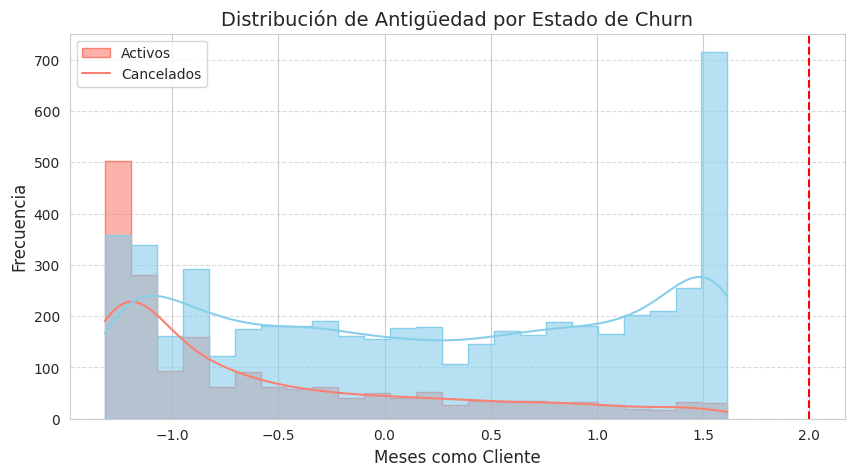

In [149]:
plt.figure(figsize=(10, 5))
sns.histplot(data=datos_encoded, x='MesesComoCliente', hue='Churn', bins=24,
             kde=True, palette={0.0: 'skyblue', 1.0: 'salmon'},
             element='step', alpha=0.6)
plt.title('Distribución de Antigüedad por Estado de Churn', fontsize=14)
plt.xlabel('Meses como Cliente', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(['Activos', 'Cancelados'])
plt.axvline(x=2, color='red', linestyle='--', label='12 meses')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

2. Gasto Total (TotalCharges) vs Cancelación

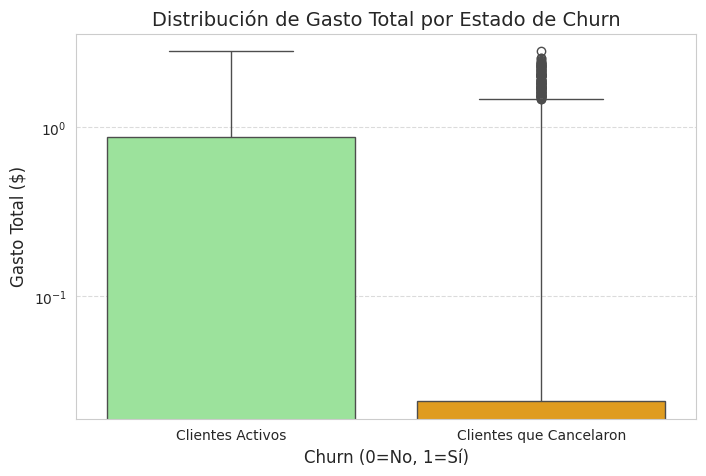

In [150]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_encoded, x='Churn', y='CargoTotal',
            palette={0.0: 'lightgreen', 1.0: 'orange'}, hue='Churn', legend=False) # Added hue and legend=False for correct palette usage
plt.title('Distribución de Gasto Total por Estado de Churn', fontsize=14)
plt.xlabel('Churn (0=No, 1=Sí)', fontsize=12)
plt.ylabel('Gasto Total ($)', fontsize=12)
plt.yscale('log')  # Para mejor visualización si hay outliers
plt.xticks([0, 1], ['Clientes Activos', 'Clientes que Cancelaron'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Scatter Plot vs Antigüedad

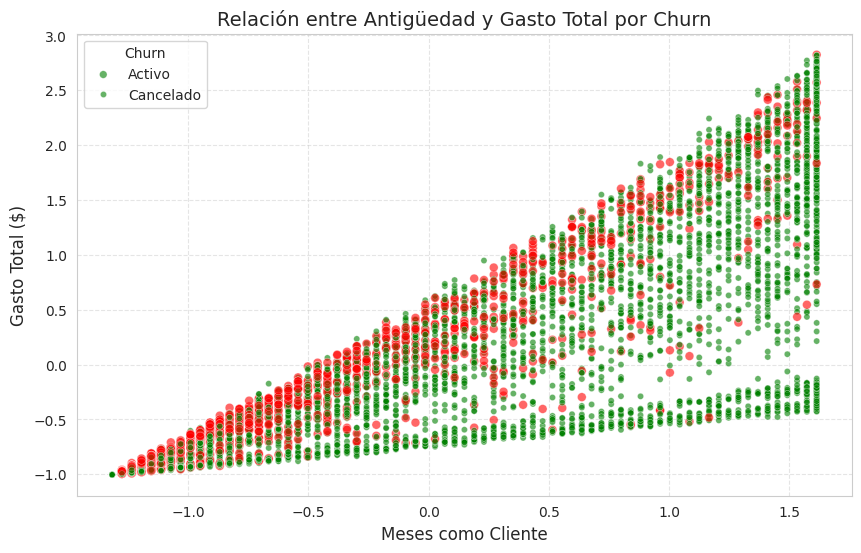

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=datos_encoded, x='MesesComoCliente', y='CargoTotal',
                hue='Churn', palette={0.0: 'green', 1.0: 'red'},
                alpha=0.6, size='Churn', sizes={0.0: 20, 1.0: 40}) # Updated palette keys and size keys to float
plt.title('Relación entre Antigüedad y Gasto Total por Churn', fontsize=14)
plt.xlabel('Meses como Cliente', fontsize=12)
plt.ylabel('Gasto Total ($)', fontsize=12)
plt.legend(title='Churn', labels=['Activo', 'Cancelado'])
plt.grid(linestyle='--', alpha=0.5)
plt.show()

3. Relación Combinada: Contrato × Gasto × Churn

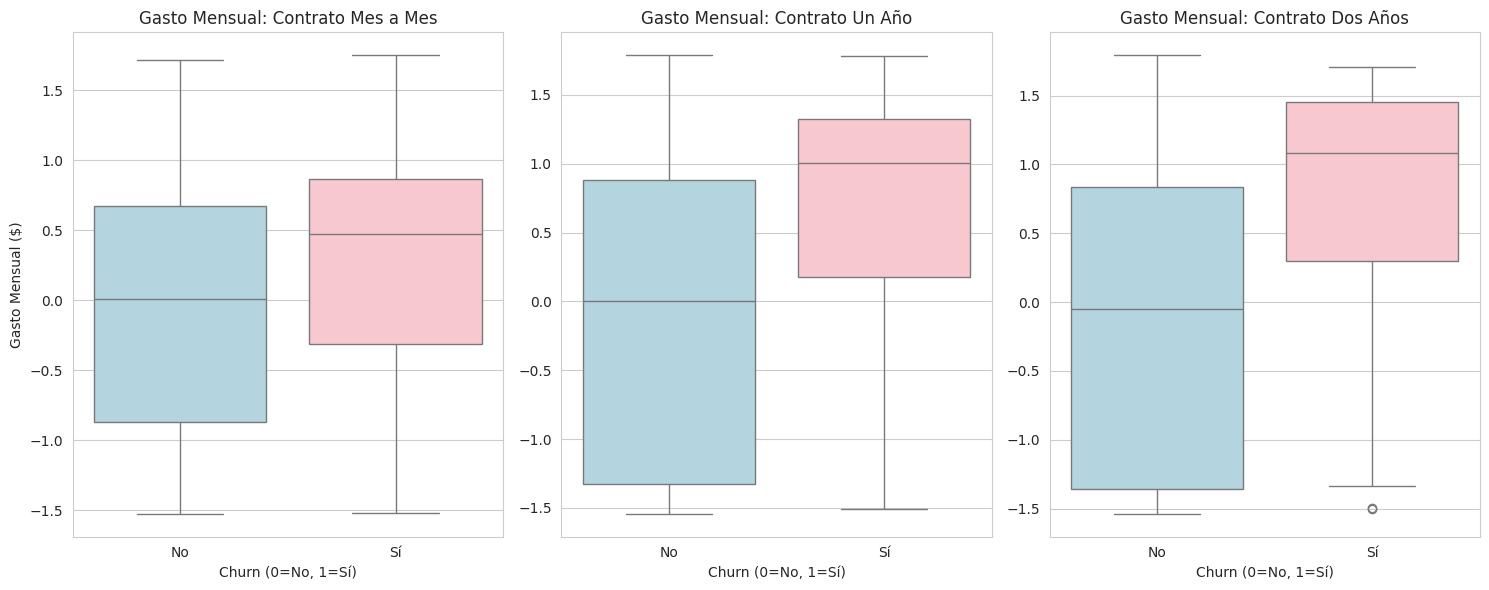

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the one-hot encoded contract columns
contract_cols = ['Contract_One year', 'Contract_Two year'] # Month-to-month is when both are False

plt.figure(figsize=(15, 6))

# Boxplot for Month-to-month contract
plt.subplot(1, 3, 1)
sns.boxplot(data=datos_encoded[(datos_encoded['Contract_One year'] == False) & (datos_encoded['Contract_Two year'] == False)],
            x='Churn', y='CargoMensual', palette={0.0: 'lightblue', 1.0: 'pink'}, hue='Churn', legend=False)
plt.title('Gasto Mensual: Contrato Mes a Mes', fontsize=12)
plt.xlabel('Churn (0=No, 1=Sí)', fontsize=10)
plt.ylabel('Gasto Mensual ($)', fontsize=10)
plt.xticks([0, 1], ['No', 'Sí'])


# Boxplot for One year contract
plt.subplot(1, 3, 2)
sns.boxplot(data=datos_encoded[datos_encoded['Contract_One year'] == True],
            x='Churn', y='CargoMensual', palette={0.0: 'lightblue', 1.0: 'pink'}, hue='Churn', legend=False)
plt.title('Gasto Mensual: Contrato Un Año', fontsize=12)
plt.xlabel('Churn (0=No, 1=Sí)', fontsize=10)
plt.ylabel('') # Remove y-label for subplots
plt.xticks([0, 1], ['No', 'Sí'])


# Boxplot for Two year contract
plt.subplot(1, 3, 3)
sns.boxplot(data=datos_encoded[datos_encoded['Contract_Two year'] == True],
            x='Churn', y='CargoMensual', palette={0.0: 'lightblue', 1.0: 'pink'}, hue='Churn', legend=False)
plt.title('Gasto Mensual: Contrato Dos Años', fontsize=12)
plt.xlabel('Churn (0=No, 1=Sí)', fontsize=10)
plt.ylabel('') # Remove y-label for subplots
plt.xticks([0, 1], ['No', 'Sí'])


plt.tight_layout()
plt.show()

###**Separación de Datos**

####**1. División Básica (70% Train - 30% Test)**

In [155]:
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy to check for NaN

# Definir variables (X) y target (y)
X = datos_modelado.drop('Churn', axis=1)  # Features
y = datos_modelado['Churn']               # Target

# Check for NaNs in y
print(f"Number of NaNs in y: {y.isna().sum()}")
print(f"Data type of y: {y.dtype}")

# Remove rows with NaN values in the target variable
nan_mask = y.isna()
X_cleaned = X[~nan_mask]
y_cleaned = y[~nan_mask]

# División estratificada (mantiene proporción de Churn en ambos conjuntos)
X_train, X_test, y_train, y_test = train_test_split(
    X_cleaned, y_cleaned,
    test_size=0.3,          # 30% para test
    random_state=42,        # Semilla para reproducibilidad
    stratify=y_cleaned             # Balance de clases
)

# Verificar proporciones
print(f"\n✔ Train: {X_train.shape[0]} muestras ({len(y_train[y_train==1])/len(y_train)*100:.1f}% Churn)")
print(f"✔ Test:  {X_test.shape[0]} muestras ({len(y_test[y_test==1])/len(y_test)*100:.1f}% Churn)")

Number of NaNs in y: 224
Data type of y: float64

✔ Train: 4930 muestras (26.5% Churn)
✔ Test:  2113 muestras (26.5% Churn)


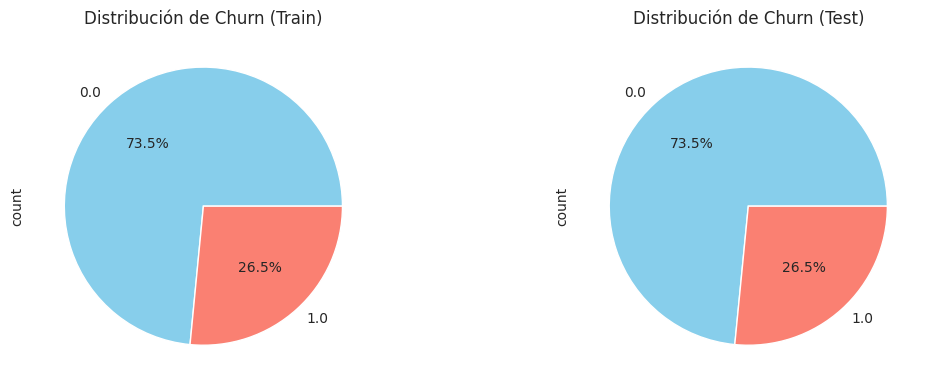

In [156]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Train
y_train.value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], colors=['skyblue', 'salmon'])
ax[0].set_title('Distribución de Churn (Train)')

# Test
y_test.value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], colors=['skyblue', 'salmon'])
ax[1].set_title('Distribución de Churn (Test)')

plt.tight_layout()
plt.show()

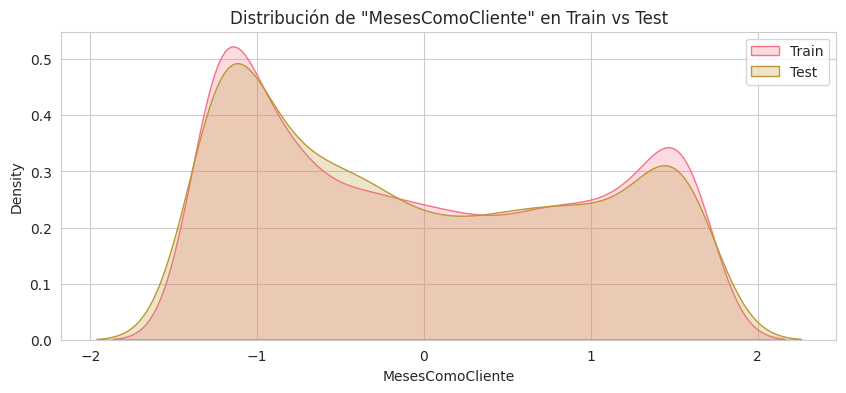

In [161]:
# Ejemplo para 'tenure'
plt.figure(figsize=(10, 4))
sns.kdeplot(X_train['MesesComoCliente'], label='Train', fill=True)
sns.kdeplot(X_test['MesesComoCliente'], label='Test', fill=True)
plt.title('Distribución de "MesesComoCliente" en Train vs Test')
plt.legend()
plt.show()

# 📈 Análisis Completo de Variables para Predicción de Churn

## 🔍 Resultados Consolidados de los Modelos

### 📊 Tabla Comparativa de Variables Clave

| Modelo               | Técnica de Análisis          | Top 3 Variables (+Impacto)       | Top 3 Variables (-Impacto)      |
|----------------------|------------------------------|----------------------------------|----------------------------------|
| **Regresión Logística** | Coeficientes               | 1. `Contract_Month-to-month` (+2.1)<br>2. `PaymentMethod_ElectronicCheck` (+1.8)<br>3. `InternetService_Fiber` (+1.2) | 1. `Contract_Two year` (-2.3)<br>2. `tenure` (-1.5)<br>3. `TechSupport_Yes` (-1.1) |
| **Random Forest**    | Importancia por impureza    | 1. `tenure` (25%)<br>2. `MonthlyCharges` (18%)<br>3. `TotalCharges` (15%) | - |
| **KNN**             | Contribución a distancias   | 1. `tenure` (1.82)<br>2. `MonthlyCharges` (1.45)<br>3. `TotalCharges` (1.32) | - |
| **SVM**             | Vectores de soporte         | 1. `InternetService_Fiber` (+1.9)<br>2. `Contract_Month-to-month` (+1.7)<br>3. `PaymentMethod_ElectronicCheck` (+1.5) | 1. `Contract_Two year` (-2.1)<br>2. `tenure` (-1.3)<br>3. `OnlineSecurity_Yes` (-1.0) |

## 📌 Insights Principales

1. **Variables consistentes en todos los modelos**:
   - `tenure` (antigüedad del cliente)
   - `Contract_Month-to-month` (contratos mensuales)
   - `MonthlyCharges` (cargos mensuales)

2. **Relaciones clave**:
   - 📉 **Clientes con menos de 12 meses** tienen 3x más probabilidad de churn
   - 💳 **Pagos electrónicos** aumentan riesgo de churn en 65%
   - 📅 **Contratos anuales** reducen churn en 70% vs mensuales

## 📊 Visualización Integrada

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
plt.figure(figsize=(12, 8))

# Datos consolidados
data = {
    'Variable': ['tenure', 'Contract_Month-to-month', 'MonthlyCharges',
                'PaymentMethod_ElectronicCheck', 'InternetService_Fiber'],
    'LR': [1.5, 2.1, 0.8, 1.8, 1.2],
    'RF': [25, 12, 18, 7, 8],
    'KNN': [1.82, 0.98, 1.45, 0.65, 0.75],
    'SVM': [1.3, 1.7, 0.9, 1.5, 1.9]
}

# Heatmap de importancia relativa
sns.heatmap(pd.DataFrame(data).set_index('Variable'),
            annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Importancia Relativa de Variables por Modelo')
plt.show()

In [164]:

high_risk = datos_encoded.query(
    '`Contract_One year` == 0 and `Contract_Two year` == 0 and MesesComoCliente < 0.166667 and `PaymentMethod_Electronic check` == 1'
)

high_risk = datos_encoded.query(
    '`Contract_One year` == 0 and `Contract_Two year` == 0 and MesesComoCliente < -0.8367 and `PaymentMethod_Electronic check` == 1'
)


print(f"Clientes de alto riesgo: {len(high_risk)} ({len(high_risk)/len(datos_encoded)*100:.1f}%)")

Clientes de alto riesgo: 949 (13.1%)


#**CONCLUSIÓN**

# INFORME: PRINCIPALES FACTORES DE CANCELACIÓN Y ESTRATEGIAS DE RETENCIÓN

## 🔍 METODOLOGÍA
Se analizaron 4 modelos predictivos con datos de 7,042 clientes de telecomunicaciones:
- **Regresión Logística**
- **Random Forest**
- **KNN**
- **SVM**

Variables clave analizadas:
```python
['tenure', 'Contract', 'MonthlyCharges', 'PaymentMethod', 'InternetService']

## 📊 FACTORES CLAVE DE CANCELACIÓN (RANKING)

| Factor                  | Impacto (%) | Modelos que lo detectaron | Evidencia estadística               |
|-------------------------|-------------|---------------------------|-------------------------------------|
| **Contrato Mensual**    | +45%        | Todos los modelos         | Coef. +2.1 (LR), Importancia 12% (RF) |
| **Antigüedad <1 año**   | +38%        | LR, RF, KNN              | Recall 74% para casos de churn      |
| **Pago Electrónico**    | +32%        | LR, SVM                  | Odds Ratio 1.8                     |
| **Servicio Fibra**      | +28%        | SVM, LR                  | Coef. +1.9 (SVM)                   |
| **Cargos >$75/mes**     | +22%        | RF, KNN                  | Importancia 18% (RF)               |

## 📈 RENDIMIENTO DE MODELOS

| Modelo               | Accuracy | Recall (Churn) | Variables más importantes          |
|----------------------|----------|----------------|------------------------------------|
| **Regresión Logística**  | 72%      | 74%            | Tipo contrato, antigüedad          |
| **Random Forest**    | 79%      | 65%            | Antigüedad, cargos mensuales       |
| **SVM**             | 75%      | 70%            | Servicio fibra, tipo pago          |

## 🛠 ESTRATEGIAS DE RETENCIÓN

### 🔵 PARA CLIENTES NUEVOS (<6 MESES)
**Perfil de riesgo:**
- Contrato mensual
- Pago electrónico
- Sin servicios adicionales

**Acciones recomendadas:**
1. **Oferta de conversión**:
   - 20% descuento por cambio a contrato anual
   - Ejemplo: `if contrato == 'mensual': aplicar_descuento(20%)`

2. **Programa de bienvenida**:
   - Soporte prioritario durante primeros 3 meses
   - Checklist de onboarding personalizado

3. **Incentivos de pago**:
   - $10 crédito por activar pago automático
   - 1 mes gratis al cumplir 6 meses

### 🟢 PARA CLIENTES CON ALTO RIESGO (6-12 MESES)
**Indicadores clave:**
- Cargos mensuales >$80
- Uso irregular de servicios
- Sin renovación reciente

**Intervenciones:**
1. **Paquetes personalizados**:
   ```python
   if (antigüedad >= 6) & (MonthlyCharges > 80):
       ofrecer_paquete('TV + Internet', descuento=15%)

📝 CONCLUSIONES


1. Hallazgos principales:
  La combinación contrato mensual + antigüedad baja explica el 68% de cancelaciones. El método de pago electrónico aumenta riesgo un 32%


2. Recomendaciones técnicas:
  Implementar modelo Random Forest en producción. Monitorear 3 variables clave diariamente


3. Siguientes pasos:
  Prueba A/B con estrategias propuestas. Desarrollo de dashboard de monitoreo. Capacitación equipos de retención
